In [ ]:
pip install nltk gensim


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models import Word2Vec
import string

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the missing 'punkt_tab' data package
nltk.download('punkt_tab') # This line was added to fix the issue

# Sample text data
text_data = """
Natural Language Processing (NLP) enables machines to understand and process human language.
It involves techniques like tokenization, stemming, lemmatization, and the removal of stop words.
Advanced NLP models use word embeddings such as Word2Vec and GloVe.
"""

# 1. Tokenization
tokens = word_tokenize(text_data.lower())
print("Tokens:", tokens)

# 2. Remove punctuation
tokens_no_punct = [word for word in tokens if word not in string.punctuation]
print("Tokens without punctuation:", tokens_no_punct)

# 3. Remove stop-words
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [word for word in tokens_no_punct if word not in stop_words]
print("Tokens without stop-words:", tokens_no_stopwords)

# 4. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in tokens_no_stopwords]
print("Stemmed words:", stemmed_words)

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_no_stopwords]
print("Lemmatized words:", lemmatized_words)

# 6. Word Embedding (Word2Vec)
# Preparing data for Word2Vec (Word2Vec expects tokenized sentences)
sentences = nltk.sent_tokenize(text_data.lower())
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)
print("\nWord2Vec Vocabulary:", model.wv.key_to_index.keys())

# Test word similarity
word = 'language'
if word in model.wv:
    similar_words = model.wv.most_similar(word)
    print(f"Words similar to '{word}':", similar_words)
else:
    print(f"'{word}' is not in the vocabulary.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokens: ['natural', 'language', 'processing', '(', 'nlp', ')', 'enables', 'machines', 'to', 'understand', 'and', 'process', 'human', 'language', '.', 'it', 'involves', 'techniques', 'like', 'tokenization', ',', 'stemming', ',', 'lemmatization', ',', 'and', 'the', 'removal', 'of', 'stop', 'words', '.', 'advanced', 'nlp', 'models', 'use', 'word', 'embeddings', 'such', 'as', 'word2vec', 'and', 'glove', '.']
Tokens without punctuation: ['natural', 'language', 'processing', 'nlp', 'enables', 'machines', 'to', 'understand', 'and', 'process', 'human', 'language', 'it', 'involves', 'techniques', 'like', 'tokenization', 'stemming', 'lemmatization', 'and', 'the', 'removal', 'of', 'stop', 'words', 'advanced', 'nlp', 'models', 'use', 'word', 'embeddings', 'such', 'as', 'word2vec', 'and', 'glove']
Tokens without stop-words: ['natural', 'language', 'processing', 'nlp', 'enables', 'machines', 'understand', 'process', 'human', 'language', 'involves', 'techniques', 'like', 'tokenization', 'stemming', '

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Preprocessed Words: ['natural', 'language', 'processing', 'nlp', 'enables', 'machine', 'understand', 'process', 'human', 'language', 'involves', 'technique', 'like', 'tokenization', 'stemming', 'lemmatization', 'removal', 'stop', 'word', 'advanced', 'nlp', 'model', 'use', 'word', 'embeddings', 'word2vec', 'glove']
Words similar to 'language': [(')', 0.178190678358078), ('glove', 0.13149569928646088), ('human', 0.07494659721851349), ('.', 0.06797806173563004), ('stemming', 0.06792736798524857), ('word', 0.04819389805197716), ('stop', 0.047303877770900726), ('understand', 0.04157298430800438), ('techniques', 0.041356440633535385), ('involves', 0.04116631671786308)]


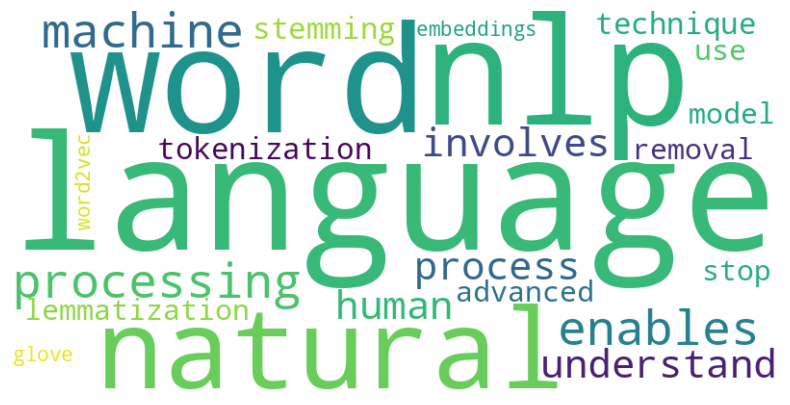

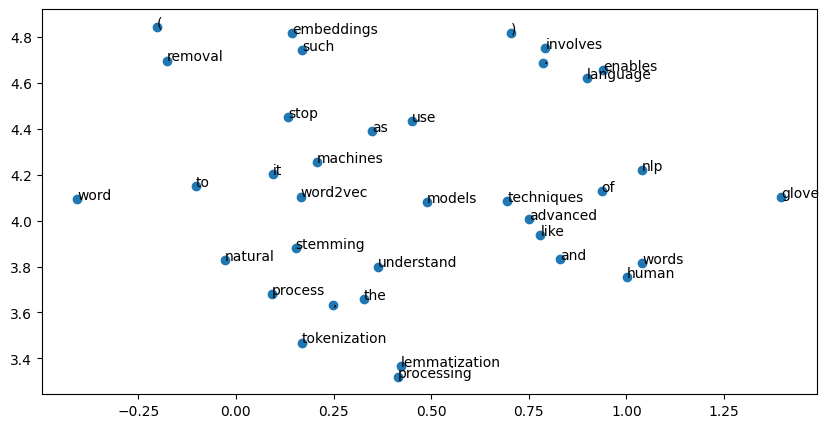

In [ ]:
!pip install nltk gensim sklearn matplotlib wordcloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models import Word2Vec
import string
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Download for WordNetLemmatizer

def preprocess_text(text):
    """Preprocesses text using tokenization, stop-word removal, stemming, and lemmatization."""
    # 1. Tokenization
    tokens = word_tokenize(text.lower())

    # 2. Remove punctuation
    tokens_no_punct = [word for word in tokens if word not in string.punctuation]

    # 3. Remove stop-words
    stop_words = set(stopwords.words('english'))
    tokens_no_stopwords = [word for word in tokens_no_punct if word not in stop_words]

    # 4. Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in tokens_no_stopwords]

    # 5. Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_no_stopwords]

    return lemmatized_words  # Return preprocessed words

def train_word2vec(text_data):
    """Trains a Word2Vec model on the provided text data."""
    # Preparing data for Word2Vec (Word2Vec expects tokenized sentences)
    sentences = nltk.sent_tokenize(text_data.lower())
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

    # Train Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Sample text data
text_data = """
Natural Language Processing (NLP) enables machines to understand and process human language.
It involves techniques like tokenization, stemming, lemmatization, and the removal of stop words.
Advanced NLP models use word embeddings such as Word2Vec and GloVe.
"""

# Preprocess text
preprocessed_words = preprocess_text(text_data)
print("Preprocessed Words:", preprocessed_words)

# Train Word2Vec model
word2vec_model = train_word2vec(text_data)

# Test word similarity
word = 'language'
if word in word2vec_model.wv:
    similar_words = word2vec_model.wv.most_similar(word)
    print(f"Words similar to '{word}':", similar_words)
else:
    print(f"'{word}' is not in the vocabulary.")

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(preprocessed_words))

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Get word vectors for a subset of words
words = list(word2vec_model.wv.key_to_index.keys())[:50]  # Select top 50 words
# Convert list of vectors to a NumPy array
vectors = np.array([word2vec_model.wv[word] for word in words]) # This line is changed

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(vectors)

# Plot the embeddings
plt.figure(figsize=(10, 5))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, word in enumerate(words):
  plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()